<a href="https://colab.research.google.com/github/cuducquang/Deep-Learning/blob/main/version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE

In [ ]:
data = np.load('dataset_dev_3000.npz')
X = data['X']   # Input images
y = data['y']   # Multi-target labels

# 2. Decompose Targets for Analysis
# y[:, 0]: Target A (Classification 0-9)
# y[:, 1]: Target B (Classification 0-31)
# y[:, 2]: Target C (Regression 0-1)
y_target_A = y[:, 0].astype(int)
y_target_B = y[:, 1].astype(int)
y_target_C = y[:, 2]

print("Data Loaded Successfully")
print(f"X Shape: {X.shape} | Type: {X.dtype}")
print(f"y Shape: {y.shape} | Type: {y.dtype}")
print("-" * 30)
print(f"Target A (Class 10): Unique values: {np.unique(y_target_A)}")
print(f"Target B (Class 32): Unique values count: {len(np.unique(y_target_B))}")
print(f"Target C (Regress):  Range [{y_target_C.min():.4f}, {y_target_C.max():.4f}]")

Data Loaded Successfully
X Shape: (3000, 32, 32) | Type: float32
y Shape: (3000, 3) | Type: float32
------------------------------
Target A (Class 10): Unique values: [0 1 2 3 4 5 6 7 8 9]
Target B (Class 32): Unique values count: 32
Target C (Regress):  Range [0.0003, 0.9996]


In [ ]:
# Check Pixel Intensity Statistics
print(" Pixel Value Statistics:")
print(f"Min : {X.min()}")
print(f"Max : {X.max()}")
print(f"Mean: {X.mean():.2f}")
print(f"Std : {X.std():.2f}")

# Check for Channel Dimension
if X.ndim == 3:
    print("Insight: Images are Rank-3 (N, H, W). Need to expand dims to (N, H, W, 1) for CNN.")
else:
    print("Images already have channel dimension.")

 Pixel Value Statistics:
Min : 5.5413776863133535e-05
Max : 6.8485941886901855
Mean: 0.81
Std : 0.74
Insight: Images are Rank-3 (N, H, W). Need to expand dims to (N, H, W, 1) for CNN.


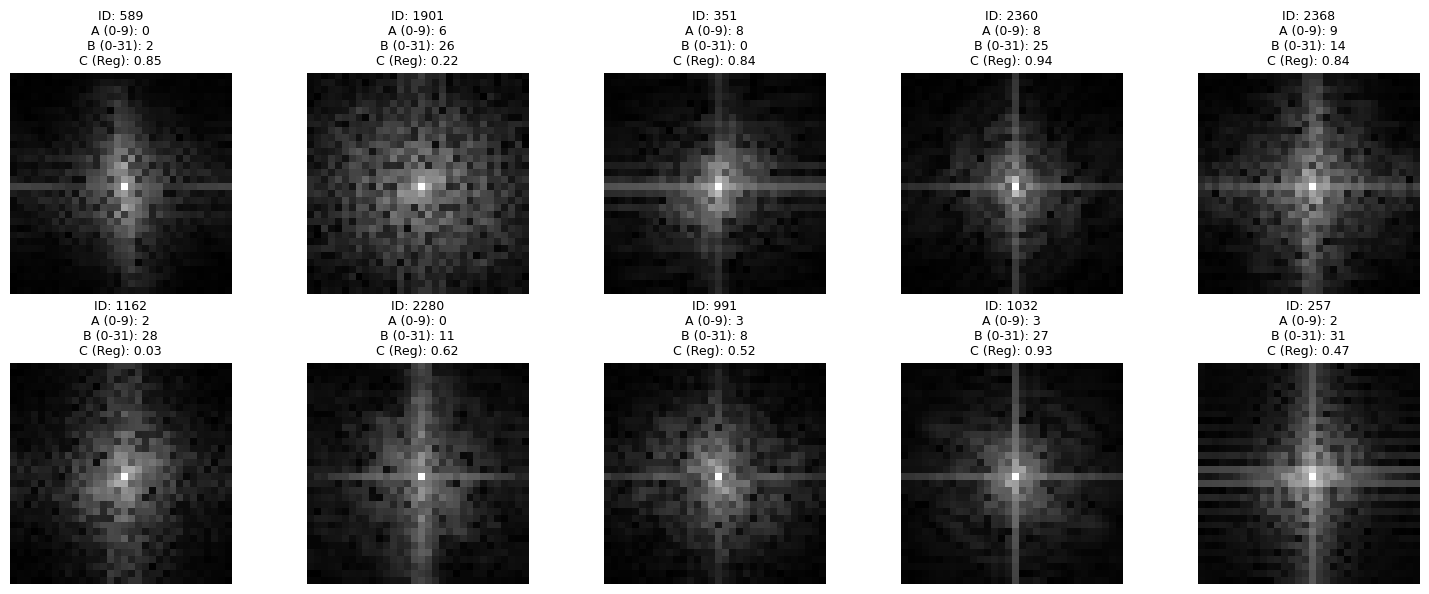

In [ ]:
# Visualize random samples with their 3 labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
indices = np.random.choice(len(X), 10, replace=False)

for i, ax in enumerate(axes.flat):
    idx = indices[i]
    img = X[idx]

    # Display Image
    ax.imshow(img, cmap='gray')

    # Construct Title with all 3 targets
    label_str = (f"ID: {idx}\n"
                 f"A (0-9): {y_target_A[idx]}\n"
                 f"B (0-31): {y_target_B[idx]}\n"
                 f"C (Reg): {y_target_C[idx]:.2f}")

    ax.set_title(label_str, fontsize=9)
    ax.axis('off')

plt.tight_layout()
plt.show()

Target A Balance Check: {np.int64(0): np.int64(290), np.int64(1): np.int64(304), np.int64(2): np.int64(311), np.int64(3): np.int64(305), np.int64(4): np.int64(306), np.int64(5): np.int64(294), np.int64(6): np.int64(290), np.int64(7): np.int64(291), np.int64(8): np.int64(310), np.int64(9): np.int64(299)}


/tmp/ipython-input-1577794033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_target_A, palette='viridis')


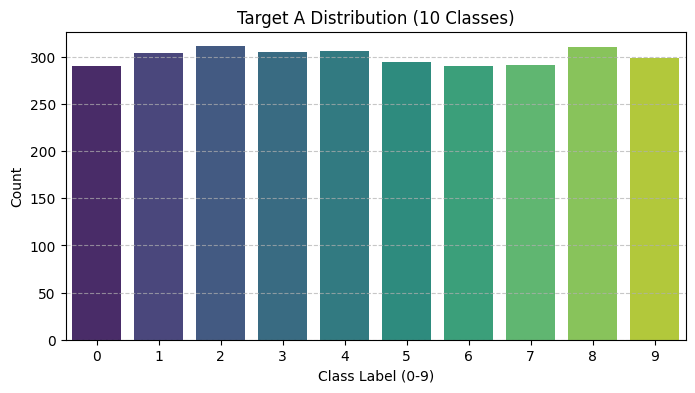

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_target_A, palette='viridis')
plt.title("Target A Distribution (10 Classes)")
plt.xlabel("Class Label (0-9)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Check exact counts
unique, counts = np.unique(y_target_A, return_counts=True)
print("Target A Balance Check:", dict(zip(unique, counts)))
plt.show()

/tmp/ipython-input-1059615394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_target_B, palette='magma')


Target B - Min samples per class: 75
Target B - Max samples per class: 113


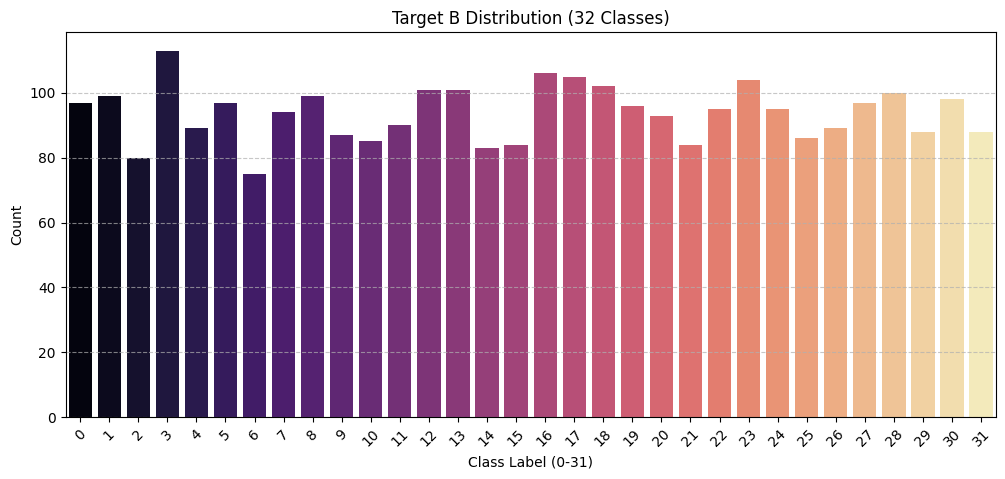

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x=y_target_B, palette='magma')
plt.title("Target B Distribution (32 Classes)")
plt.xlabel("Class Label (0-31)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Statistics for Target B
unique_b, counts_b = np.unique(y_target_B, return_counts=True)
print(f"Target B - Min samples per class: {counts_b.min()}")
print(f"Target B - Max samples per class: {counts_b.max()}")
plt.show()

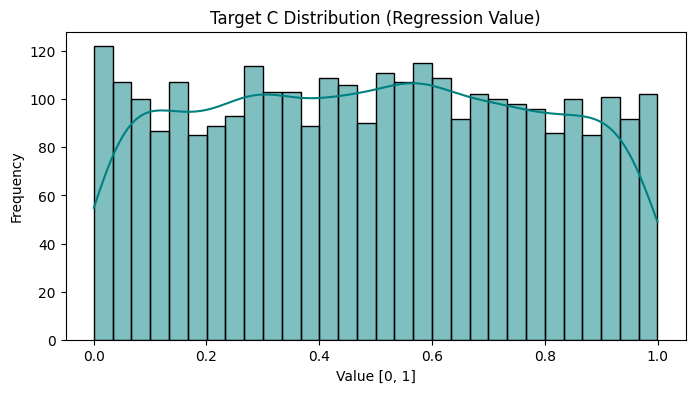

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(y_target_C, kde=True, bins=30, color='teal')
plt.title("Target C Distribution (Regression Value)")
plt.xlabel("Value [0, 1]")
plt.ylabel("Frequency")
plt.show()

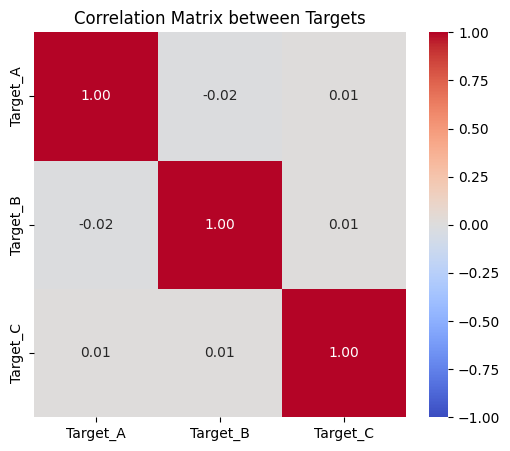

In [ ]:
# Create a DataFrame for correlation checking
df_targets = pd.DataFrame({
    'Target_A': y_target_A,
    'Target_B': y_target_B,
    'Target_C': y_target_C
})

# Compute Correlation Matrix
corr_matrix = df_targets.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix between Targets")
plt.show()

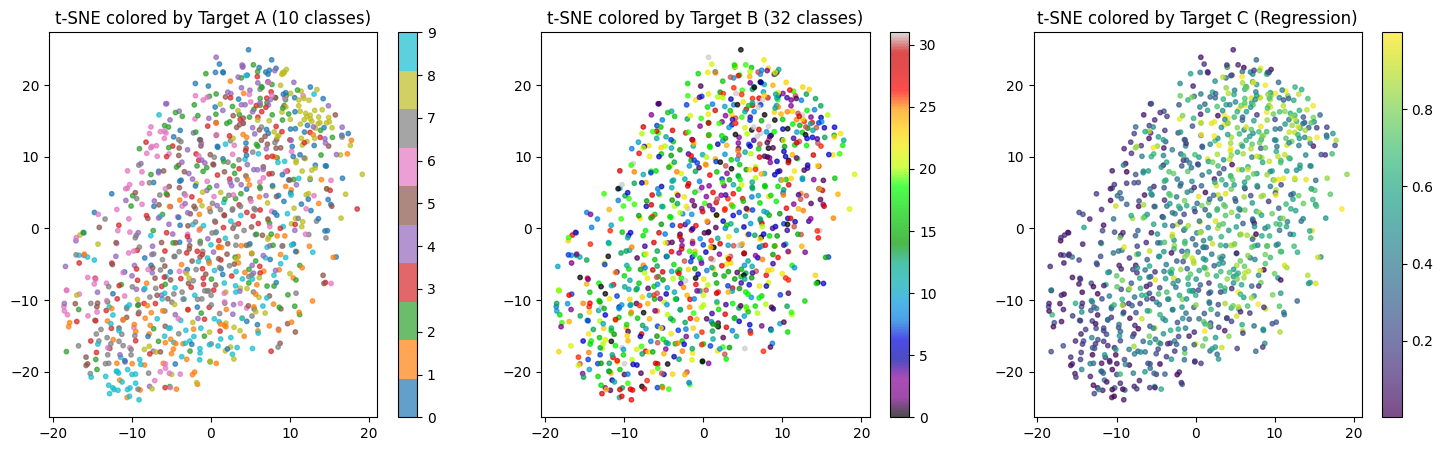

In [ ]:
# Subsample for speed (1000 samples)
idx_subset = np.random.choice(len(X), 1000, replace=False)
X_tsne_input = X[idx_subset].reshape(1000, -1)
y_tsne_A = y_target_A[idx_subset]
y_tsne_B = y_target_B[idx_subset]
y_tsne_C = y_target_C[idx_subset]

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_embedded = tsne.fit_transform(X_tsne_input)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot colored by Target A
scatter1 = axes[0].scatter(X_embedded[:,0], X_embedded[:,1], c=y_tsne_A, cmap='tab10', s=10, alpha=0.7)
axes[0].set_title("t-SNE colored by Target A (10 classes)")
plt.colorbar(scatter1, ax=axes[0])

# Plot colored by Target B
scatter2 = axes[1].scatter(X_embedded[:,0], X_embedded[:,1], c=y_tsne_B, cmap='nipy_spectral', s=10, alpha=0.7)
axes[1].set_title("t-SNE colored by Target B (32 classes)")
plt.colorbar(scatter2, ax=axes[1])

# Plot colored by Target C
scatter3 = axes[2].scatter(X_embedded[:,0], X_embedded[:,1], c=y_tsne_C, cmap='viridis', s=10, alpha=0.7)
axes[2].set_title("t-SNE colored by Target C (Regression)")
plt.colorbar(scatter3, ax=axes[2])

plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

# 1. Normalize & Reshape
#  max value = 6.8485941886901855
MAX_PIXEL_VALUE = X.max()
X_norm = X.astype('float32') / MAX_PIXEL_VALUE
X_norm = np.expand_dims(X_norm, axis=-1) # (3000, 32, 32, 1)

# 2. Decompose Targets
y_A_raw = y[:, 0].astype(int)   # Class 0-9
y_B_raw = y[:, 1].astype(int)   # Class 0-31
y_C_raw = y[:, 2].astype(float) # Regression

# 3. Split Data (Train 70% - Val 15% - Test 15%)
from sklearn.model_selection import train_test_split

# Split 1: Train vs Temp
X_train, X_temp, yA_train, yA_temp, yB_train, yB_temp, yC_train, yC_temp = train_test_split(
    X_norm, y_A_raw, y_B_raw, y_C_raw,
    test_size=0.3, random_state=42, stratify=y_B_raw
)

# Split 2: Val vs Test
X_val, X_test, yA_val, yA_test, yB_val, yB_test, yC_val, yC_test = train_test_split(
    X_temp, yA_temp, yB_temp, yC_temp,
    test_size=0.5, random_state=42, stratify=yB_temp
)

# 4. Target Encoding
# Target A & B: One-hot Encoding
yA_train_cat = to_categorical(yA_train, num_classes=10)
yA_val_cat   = to_categorical(yA_val, num_classes=10)
yA_test_cat  = to_categorical(yA_test, num_classes=10)

yB_train_cat = to_categorical(yB_train, num_classes=32)
yB_val_cat   = to_categorical(yB_val, num_classes=32)
yB_test_cat  = to_categorical(yB_test, num_classes=32)

# Target C: Reshape to (N, 1) for Regression
yC_train_reg = yC_train.reshape(-1, 1)
yC_val_reg   = yC_val.reshape(-1, 1)
yC_test_reg  = yC_test.reshape(-1, 1)

print(f"Train Set: {X_train.shape}")
print(f"Val Set:   {X_val.shape}")
print(f"Test Set:  {X_test.shape}")

Train Set: (2100, 32, 32, 1)
Val Set:   (450, 32, 32, 1)
Test Set:  (450, 32, 32, 1)


In [ ]:
# DATA AUGMENTATION & MULTI-OUTPUT GENERATOR
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. augmentation
datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 2. Custom Generator Wrapper
def multi_output_data_generator(X, yA, yB, yC, batch_size):
    indices = np.arange(len(X))
    gen_X = datagen.flow(X, indices, batch_size=batch_size, shuffle=True)

    while True:
        X_batch, idx_batch = next(gen_X)

        yA_batch = yA[idx_batch]
        yB_batch = yB[idx_batch]
        yC_batch = yC[idx_batch]

        yield X_batch, {
            'output_A': yA_batch,
            'output_B': yB_batch,
            'output_C': yC_batch
        }

BATCH_SIZE = 32

train_gen = multi_output_data_generator(
    X_train, yA_train_cat, yB_train_cat, yC_train_reg,
    batch_size=BATCH_SIZE
)

val_gen = multi_output_data_generator(
    X_val, yA_val_cat, yB_val_cat, yC_val_reg,
    batch_size=BATCH_SIZE
)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_multitask_model(input_shape=(32, 32, 1)):
    # 1. SHARED BACKBONE (Feature Extractor)

    inputs = Input(shape=input_shape, name='input_image')

    # Block 1: Low-level features
    x = Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x) # Output: 16x16

    # Block 2: Mid-level features
    x = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x) # Output: 8x8

    # Block 3: High-level features (Bottleneck)
    x = Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x) # Output: 4x4

    # Global Flatten
    shared_features = Flatten(name='shared_flatten')(x)
    shared_features = Dropout(0.4, name='shared_dropout')(shared_features)

    # 2. TASK-SPECIFIC BRANCHES (Heads)

    # --- Branch A: Classification (0-9) ---
    # (10 class)
    x_a = Dense(64, activation='relu')(shared_features)
    x_a = BatchNormalization()(x_a)
    x_a = Dropout(0.3)(x_a)
    output_a = Dense(10, activation='softmax', name='output_A')(x_a)

    # --- Branch B: Classification (0-31) ---
    # (32 class)
    x_b = Dense(128, activation='relu')(shared_features)
    x_b = BatchNormalization()(x_b)
    x_b = Dropout(0.3)(x_b)
    output_b = Dense(32, activation='softmax', name='output_B')(x_b)

    # --- Branch C: Regression (0-1) ---
    x_c = Dense(32, activation='relu')(shared_features)
    output_c = Dense(1, activation='sigmoid', name='output_C')(x_c)

    # 3. MODEL ASSEMBLY
    model = Model(inputs=inputs, outputs=[output_a, output_b, output_c], name='MultiTask_CNN')

    return model

model = build_multitask_model()
model.summary()

Model: "MultiTask_CNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        320 │ input_image[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 64)  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 128) │     73,856 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_flatten      │ (None, 2048)      │          0 │ max_pooling2d_2[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_dropout      │ (None, 2048)      │          0 │ shared_flatten[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    131,136 │ shared_dropout[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │    262,272 │ shared_dropout[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense[0][0]     

 Total params: 558,123 (2.13 MB)

 Trainable params: 557,291 (2.13 MB)

 Non-trainable params: 832 (3.25 KB)

In [ ]:
LOSS_WEIGHTS = {
    'output_A': 1.0,
    'output_B': 1.0,
    'output_C': 5.0  # Boost gradient for branch Regression
}

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={
        'output_A': 'categorical_crossentropy',
        'output_B': 'categorical_crossentropy',
        'output_C': 'mse' # Mean Squared Error
    },
    loss_weights=LOSS_WEIGHTS,
    metrics={
        'output_A': 'accuracy',
        'output_B': 'accuracy',
        'output_C': 'mae' # Mean Absolute Error
    }
)

Starting Training (Multi-Task)...
Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 132ms/step - loss: 7.8620 - output_A_accuracy: 0.1288 - output_A_loss: 2.8511 - output_B_accuracy: 0.0311 - output_B_loss: 4.3121 - output_C_loss: 0.1398 - output_C_mae: 0.2987 - val_loss: 6.3631 - val_output_A_accuracy: 0.1429 - val_output_A_loss: 2.3607 - val_output_B_accuracy: 0.0312 - val_output_B_loss: 3.6179 - val_output_C_loss: 0.0769 - val_output_C_mae: 0.2391
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 6.6141 - output_A_accuracy: 0.1999 - output_A_loss: 2.3139 - output_B_accuracy: 0.0282 - output_B_loss: 3.9649 - output_C_loss: 0.0674 - output_C_mae: 0.2103 - val_loss: 7.4062 - val_output_A_accuracy: 0.1027 - val_output_A_loss: 3.2782 - val_output_B_accuracy: 0.0290 - val_output_B_loss: 3.6598 - val_output_C_loss: 0.0936 - val_output_C_mae: 0.2534
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 6.2442 - output_A_accuracy: 0.2324 - output_A_loss: 2.1800 - output_B_accuracy: 

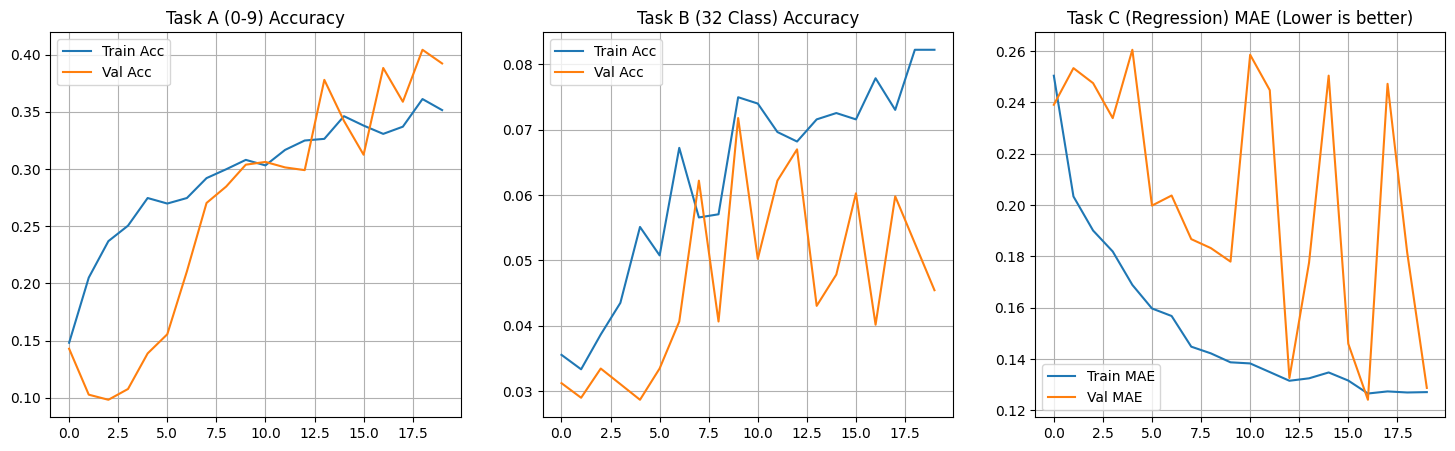

In [ ]:
steps_per_epoch  = len(X_train) // BATCH_SIZE
validation_steps = len(X_val)   // BATCH_SIZE

print("Starting Training (Multi-Task)...")

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=validation_steps,
    epochs=20,
    verbose=1
)

print("Training Complete!")

# VISUALIZE TRAINING HISTORY
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Accuracy - Task A
axes[0].plot(history.history['output_A_accuracy'], label='Train Acc')
axes[0].plot(history.history['val_output_A_accuracy'], label='Val Acc')
axes[0].set_title('Task A (0-9) Accuracy')
axes[0].legend()
axes[0].grid(True)

# Plot Accuracy - Task B
axes[1].plot(history.history['output_B_accuracy'], label='Train Acc')
axes[1].plot(history.history['val_output_B_accuracy'], label='Val Acc')
axes[1].set_title('Task B (32 Class) Accuracy')
axes[1].legend()
axes[1].grid(True)

# Plot MAE - Task C (Regression)
axes[2].plot(history.history['output_C_mae'], label='Train MAE')
axes[2].plot(history.history['val_output_C_mae'], label='Val MAE')
axes[2].set_title('Task C (Regression) MAE (Lower is better)')
axes[2].legend()
axes[2].grid(True)

plt.show()